<a href="https://colab.research.google.com/github/ultrasage-danz/COVID-19-Data-Analysis/blob/main/COVID_19_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**COVID-19 Data Analysis**

> Import all necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> Create a dataframe from the dataset using pandas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ultrasage-danz/COVID-19-Data-Analysis/main/Covid_19_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB


> Count

In [7]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

> Check Null values using `isnull.sum()`

In [8]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

> Heatmap of null and non-null values

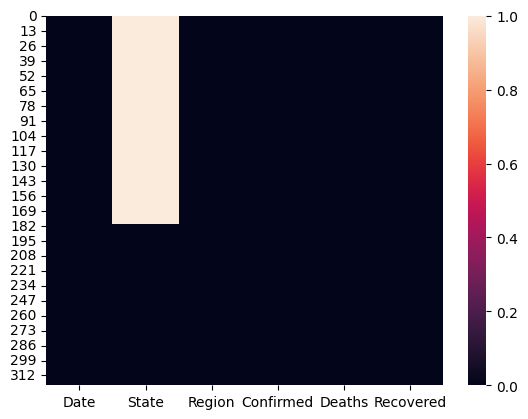

In [12]:
sns.heatmap(df.isnull())
plt.show()

> Confirmed cases, Deaths and Recoveries in each region

In [14]:
df.groupby('Region').sum()

,Date,State,Confirmed,Deaths,Recovered
Region,,,,,
Afghanistan,4/29/2020,0,1939,60,252
Albania,4/29/2020,0,766,30,455
Algeria,4/29/2020,0,3848,444,1702
Andorra,4/29/2020,0,743,42,423
Angola,4/29/2020,0,27,2,7
...,...,...,...,...,...
West Bank and Gaza,4/29/2020,0,344,2,71
Western Sahara,4/29/2020,0,6,0,5
Yemen,4/29/2020,0,6,0,1


> Only Confirmed Cases

In [4]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: Confirmed, dtype: int64

> Only Recoveries

In [25]:
df.groupby('Region')['Recovered'].sum().sort_values(ascending=False).head(10)

Region
Spain             132929
US                120720
Germany           120400
Mainland China     77610
Iran               73791
Italy              71252
France             49118
Turkey             44040
Brazil             34132
Switzerland        22600
Name: Recovered, dtype: int64

>Only deaths

In [24]:
df.groupby('Region')['Deaths'].sum().sort_values(ascending=False).head(10)

Region
US             60967
Italy          27682
UK             26166
Spain          24275
France         24121
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Netherlands     4727
Name: Deaths, dtype: int64

> Data Visualization based on above

In [6]:
!pip install pycountry

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.0 MB/s eta 0:00:00


In [8]:
import plotly.express as px

# Calculate death percentage
df['Death Percentage'] = (df['Recovered'] / df['Confirmed']) * 100

fig = px.choropleth(df,
                    locations='Region',
                    locationmode='country names',
                    color='Death Percentage',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    scope='world',
                    title='Death Percentage by Country')

fig.show()

>Remove records where confirmed cases < 10

In [10]:
df = df[df['Confirmed'] >= 10]
df

,Date,State,Region,Confirmed,Deaths,Recovered,Death Percentage,ISO_Code
0,4/29/2020,NaN,Afghanistan,1939,60,252,12.996390,AFG
1,4/29/2020,NaN,Albania,766,30,455,59.399478,ALB
2,4/29/2020,NaN,Algeria,3848,444,1702,44.230769,DZA
3,4/29/2020,NaN,Andorra,743,42,423,56.931359,AND
4,4/29/2020,NaN,Angola,27,2,7,25.925926,AGO
...,...,...,...,...,...,...,...,...
316,4/29/2020,Wyoming,US,545,7,0,0.000000,None
317,4/29/2020,Xinjiang,Mainland China,76,3,73,96.052632,None
318,4/29/2020,Yukon,Canada,11,0,0,0.000000,CAN
319,4/29/2020,Yunnan,Mainland China,185,2,181,97.837838,None


> Maximum Number of recorded confirmed cases in which region?

In [14]:
df.groupby('Region')['Confirmed'].max().sort_values(ascending=False)

Region
US                       299691
Spain                    236899
Italy                    203591
UK                       165221
France                   165093
                          ...  
Dominica                     16
Saint Kitts and Nevis        15
Nicaragua                    13
Seychelles                   11
Burundi                      11
Name: Confirmed, Length: 177, dtype: int64

> Minimum Number of recorded deaths in which region?

In [12]:
df.groupby('Region')['Deaths'].min().sort_values(ascending=False).head(10)

Region
Italy          27682
Spain          24275
Belgium         7501
Germany         6467
Iran            5957
Brazil          5513
Turkey          3081
Sweden          2462
Mexico          1732
Switzerland     1716
Name: Deaths, dtype: int64

>Number of Confirmed, Deaths and Recovered cases were reported in India till 29 April 2020

In [13]:
df[df['Region'] == 'India']

,Date,State,Region,Confirmed,Deaths,Recovered,Death Percentage,ISO_Code
74,4/29/2020,NaN,India,33062,1079,8437,25.518722,IND


>Sort the entire data based on Confirmed Cases in ascending order

In [15]:
df.sort_values(by=['Confirmed'], ascending=True)

,Date,State,Region,Confirmed,Deaths,Recovered,Death Percentage,ISO_Code
27,4/29/2020,NaN,Burundi,11,1,4,36.363636,BDI
318,4/29/2020,Yukon,Canada,11,0,0,0.000000,CAN
217,4/29/2020,Greenland,Denmark,11,0,11,100.000000,DNK
144,4/29/2020,NaN,Seychelles,11,0,6,54.545455,SYC
256,4/29/2020,Montserrat,UK,11,1,2,18.181818,None
...,...,...,...,...,...,...,...,...
57,4/29/2020,NaN,France,165093,24087,48228,29.212626,FRA
168,4/29/2020,NaN,UK,165221,26097,0,0.000000,None
80,4/29/2020,NaN,Italy,203591,27682,71252,34.997618,ITA
153,4/29/2020,NaN,Spain,236899,24275,132929,56.112098,ESP


>Sort the entire data based on Recovered Cases in descending order

In [16]:
df.sort_values(by=['Recovered'], ascending=False)

,Date,State,Region,Confirmed,Deaths,Recovered,Death Percentage,ISO_Code
153,4/29/2020,NaN,Spain,236899,24275,132929,56.112098,ESP
61,4/29/2020,NaN,Germany,161539,6467,120400,74.533085,DEU
76,4/29/2020,NaN,Iran,93657,5957,73791,78.788558,None
80,4/29/2020,NaN,Italy,203591,27682,71252,34.997618,ITA
229,4/29/2020,Hubei,Mainland China,68128,4512,63616,93.377172,None
...,...,...,...,...,...,...,...,...
253,4/29/2020,Mississippi,US,6569,250,0,0.000000,None
252,4/29/2020,Minnesota,US,4644,319,0,0.000000,None
251,4/29/2020,Michigan,US,40399,3670,0,0.000000,None
187,4/29/2020,Arkansas,US,3193,57,0,0.000000,None


In [ ]:
m